In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, r2_score


In [2]:

# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('SONY.csv')


In [3]:
# Chuyển cột 'Date' sang định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Thiết lập cột 'Date' làm chỉ số
df.set_index('Date', inplace=True)

In [31]:
# Chọn cột Close làm biến phụ thuộc
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [32]:
# Chuẩn hóa dữ liệu với phương pháp Min-Max
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

In [33]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 8:2
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [34]:
# Chuẩn bị dữ liệu huấn luyện
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [35]:
# Huấn luyện một mô hình Hồi quy Tuyến tính
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# Hiển thị các hệ số và R-squared của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.3003275686834843
Coefficients: [0.00022618]
R-squared: 0.24855529933004805


In [37]:
# Chuẩn bị dữ liệu kiểm tra
x_test = np.arange(train_size, len(data_scaled)).reshape(-1, 1)
y_test = test_data.reshape(-1)

In [38]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(x_test)

In [39]:
# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# In ra các chỉ số đánh giá
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)


MSE: 0.03453052138629802
RMSE: 0.18582389885668105
MAPE: 0.3486533103052585


In [40]:
# Tạo dự đoán cho 30 ngày tiếp theo sau khi hoàn thành kiểm tra
last_index =  df_Close.index[-1]
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))


In [41]:
# In ra dự đoán giá đóng cửa cho 30 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 30 ngày tiếp theo:')
print(y_next_30_days.flatten())

Dự đoán giá đóng cửa cho 30 ngày tiếp theo:
[105.61605919 105.63563716 105.65521513 105.6747931  105.69437107
 105.71394904 105.73352702 105.75310499 105.77268296 105.79226093
 105.8118389  105.83141687 105.85099484 105.87057281 105.89015079
 105.90972876 105.92930673 105.9488847  105.96846267 105.98804064
 106.00761861 106.02719658 106.04677456 106.06635253 106.0859305
 106.10550847 106.12508644 106.14466441 106.16424238 106.18382035]


In [42]:
# Lấy ngày cuối cùng từ chỉ số hiện tại
last_date = df.index[-1]

In [43]:
# Thêm một ngày vào ngày cuối cùng
next_date = last_date + pd.DateOffset(days=1)

In [44]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 30 ngày tới
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

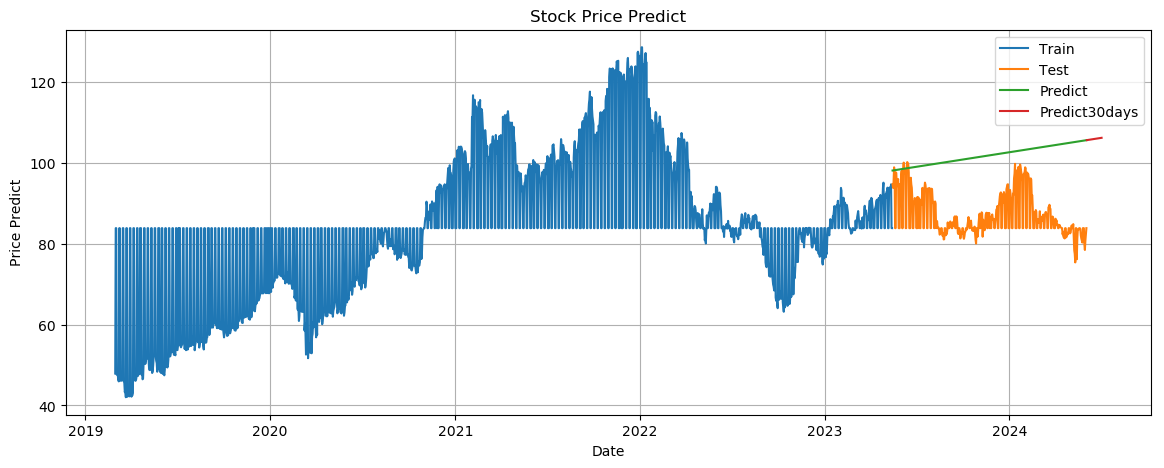

In [45]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 30 ngày tiếp theo
plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [46]:
# Tạo dự đoán cho 60 ngày tiếp theo
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

In [47]:
# In ra dự đoán giá đóng cửa cho 60 ngày tiếp theo
print('Dự đoán giá đóng cửa cho 60 ngày tiếp theo:')
print(y_next_60_days.flatten())

Dự đoán giá đóng cửa cho 60 ngày tiếp theo:
[105.61605919 105.63563716 105.65521513 105.6747931  105.69437107
 105.71394904 105.73352702 105.75310499 105.77268296 105.79226093
 105.8118389  105.83141687 105.85099484 105.87057281 105.89015079
 105.90972876 105.92930673 105.9488847  105.96846267 105.98804064
 106.00761861 106.02719658 106.04677456 106.06635253 106.0859305
 106.10550847 106.12508644 106.14466441 106.16424238 106.18382035
 106.20339833 106.2229763  106.24255427 106.26213224 106.28171021
 106.30128818 106.32086615 106.34044412 106.3600221  106.37960007
 106.39917804 106.41875601 106.43833398 106.45791195 106.47748992
 106.4970679  106.51664587 106.53622384 106.55580181 106.57537978
 106.59495775 106.61453572 106.63411369 106.65369167 106.67326964
 106.69284761 106.71242558 106.73200355 106.75158152 106.77115949]


In [48]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 60 ngày tới
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

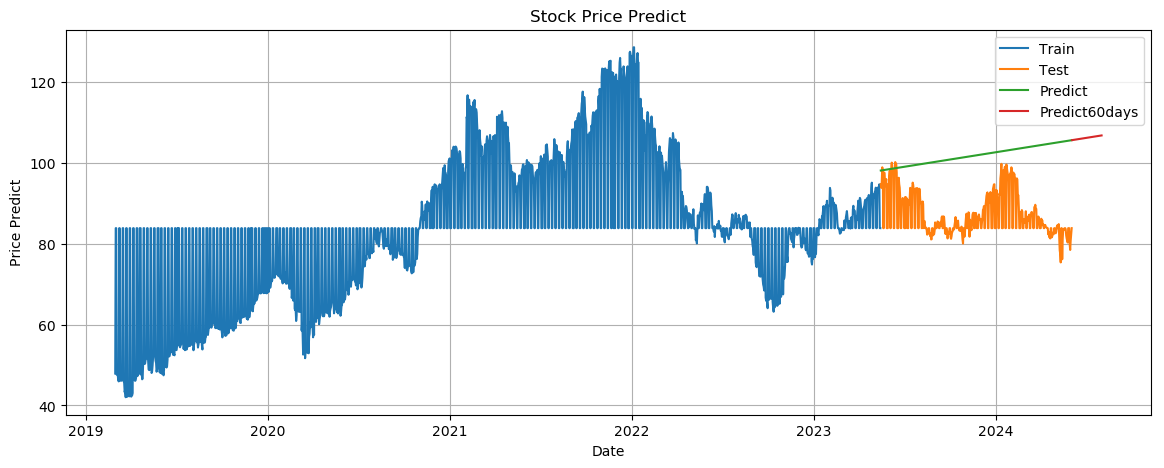

In [50]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 60 ngày tiếp theo
plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()

In [25]:
# Tạo dự đoán cho 90 ngày tiếp theo
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

In [26]:
# Tạo danh sách chỉ số bắt đầu từ ngày tiếp theo trong 90 ngày tới
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

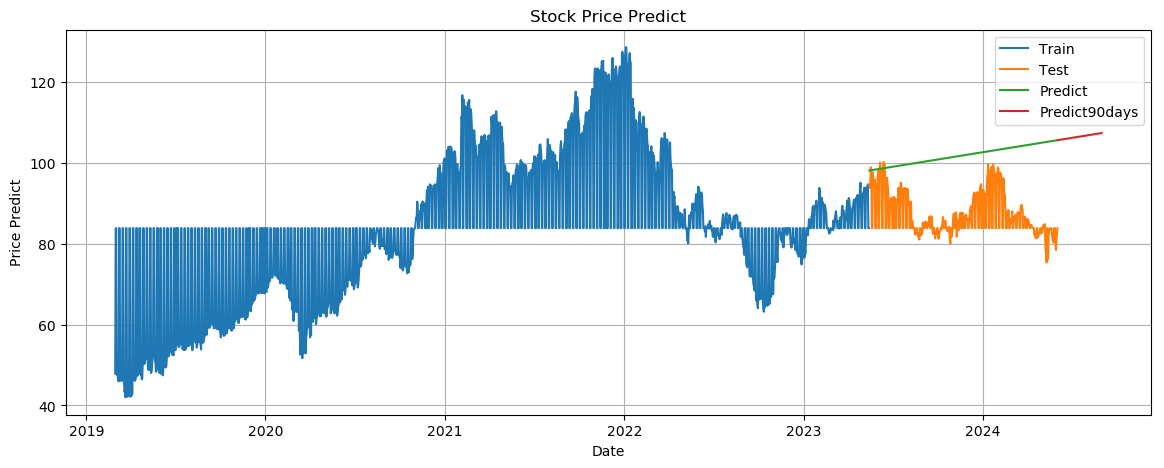

In [28]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# Vẽ dữ liệu huấn luyện
plt.plot(df.index[:train_size], scaler.inverse_transform(train_data))

# Vẽ dữ liệu kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(test_data))

# Vẽ dự đoán trên tập kiểm tra
plt.plot(df.index[train_size:], scaler.inverse_transform(y_pred.reshape(-1, 1)))

# Vẽ dự đoán cho 90 ngày tiếp theo
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])

plt.grid()
plt.title("Stock Price Predict")
plt.xlabel("Date")
plt.ylabel("Price Predict")
plt.show()